In [11]:
import numpy as np
from numpy.random import geometric
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [12]:
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
  network = list()
  hidden_layer = [{'weights':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
  network.append(hidden_layer)
  output_layer = [{'weights':[random() for i in range(n_hidden +1)]} for i in range(n_outputs)]
  network.append(output_layer)
  return network
seed(1)

from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
  activation = weights[-1]
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]
  return activation

# Transfer neuron activation
def transfer(activation):
  #sh=(round(exp(alpha*activation),5) - round(exp(-alpha*activation),5))/2
  #ch=(round(exp(alpha*activation),5) + round(exp(-alpha*activation),5))/2
  #return sh/ch
  return 1/(1 + np.exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
  return 2*alpha*(output+1) * (1.0 - (output+1)/2)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
# Update network weights with error
def update_weights(network, row, l_rate):
  for i in range(len(network)):
    inputs = row[:-1]
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']

def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
        outputs = forward_propagate(network, row)
        expected = [0 for i in range(n_outputs)]
        expected[0] = row[-1]
        sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
        backward_propagate_error(network, expected)
        update_weights(network, row, l_rate)
    print('&gt;epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


# **F1**

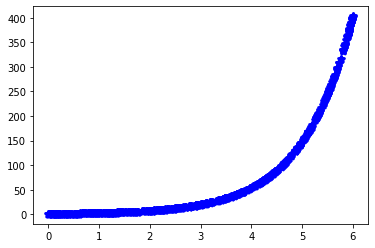

In [158]:
x=[]
i = 0
def f1(x):
  y=[]
  for i in range (0,(len(x))):
    y.append(np.exp(x[i]))
  return y

def generation_sa(count):
  xa=[]
  i = 0
  while i < count:
    rand=np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    xa.extend(rand)
    i = i + 1
  z1 = f1(xa)
  x1=np.reshape(xa,(len(xa),1))
  z1=np.reshape(z1,(len(z1),1))
  return x1, z1

qq, ee = generation_sa(500)
X_train, X_test, y_train, y_test = train_test_split(qq, ee, test_size=0.4, random_state=123)
#X_train, X_test, y_train, y_test = train_test_split(x, z, test_size=0.4, random_state=123)
plt.scatter(qq, ee, marker = '*', linewidths=3, c='BLUE')

In [68]:
dataset1 =np.concatenate((X_train,y_train),axis=1)
dataset1 = dataset1.tolist()
n_inputs = len(dataset1[0]) - 1
n_outputs = 1 
alpha=0.25
l_rate=0.1
n_epoch=300

network = initialize_network(n_inputs,30, n_outputs)
train_network(network, dataset1,l_rate, n_epoch, n_outputs)


&gt;epoch=0, lrate=0.100, error=5665392.752
&gt;epoch=1, lrate=0.100, error=5665392.745
&gt;epoch=2, lrate=0.100, error=5665392.739
&gt;epoch=3, lrate=0.100, error=5665392.734
&gt;epoch=4, lrate=0.100, error=5665392.730
&gt;epoch=5, lrate=0.100, error=5665392.726
&gt;epoch=6, lrate=0.100, error=5665392.722
&gt;epoch=7, lrate=0.100, error=5665392.719
&gt;epoch=8, lrate=0.100, error=5665392.715
&gt;epoch=9, lrate=0.100, error=5665392.713
&gt;epoch=10, lrate=0.100, error=5665392.710
&gt;epoch=11, lrate=0.100, error=5665392.708
&gt;epoch=12, lrate=0.100, error=5665392.706
&gt;epoch=13, lrate=0.100, error=5665392.703
&gt;epoch=14, lrate=0.100, error=5665392.702
&gt;epoch=15, lrate=0.100, error=5665392.700
&gt;epoch=16, lrate=0.100, error=5665392.698
&gt;epoch=17, lrate=0.100, error=5665392.697
&gt;epoch=18, lrate=0.100, error=5665392.695
&gt;epoch=19, lrate=0.100, error=5665392.694
&gt;epoch=20, lrate=0.100, error=5665392.692
&gt;epoch=21, lrate=0.100, error=5665392.691
&gt;epoch=22, lrate=

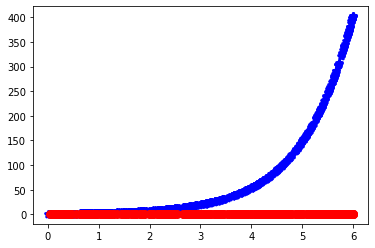

In [69]:
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs
i=-1
for row in X_train:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array(prediction)
    else:
      predictTrain =np.append(predictTrain,prediction,axis=0)

plt.scatter(qq, ee, marker = '*', linewidths=3, c='BLUE')

plt.scatter(X_train, predictTrain, marker = 'o', linewidths=3,c='RED')

In [70]:
deviations=np.std(X_train, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,X_train))

% верно полученных точек в тестовых данных


NameError: ignored

# **F2**

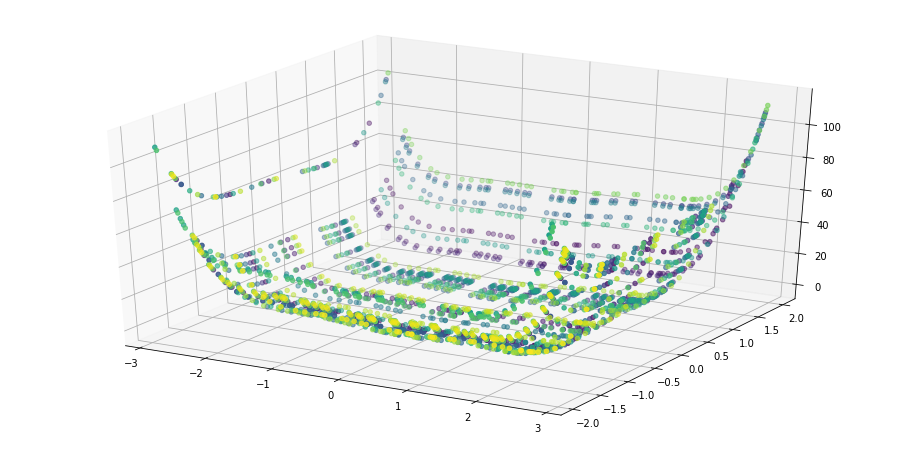

In [129]:
from numpy.random import geometric
import math
x2val=[]
x1val=[]
i = 0
while i < 50:
    rand=(np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(-3) and rand<=(3) ):
      x1val.extend(rand)
      i = i + 1

i = 0
while i < 50:
    rand=(np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(-2) and rand<=(2) ):
      x2val.extend(rand)
      i = i + 1
# x1val = np.random.uniform(-2, 2, 500) 
# x2val = np.random.uniform(-2, 2, 500) 

x1, x2 = np.meshgrid(x1val, x2val)
def f(x, y):
  return (4 - (2.1*x*x) + (x**4)/3)*x*x + x*y + (-4 + 4*y*y)*y*y

# приравниваем z к функции от x и y 
z = f(x1,x2)
x11=[]
x22=[]
zz=[]
for l in x1:
    x11.extend(l)
for l in x2:
    x22.extend(l)
for l in z:
    zz.extend(l)

x11=np.reshape(x11,(len(x11),1))
x22=np.reshape(x22,(len(x22),1))
zz=np.reshape(zz,(len(zz),1))
   
dataset =np.concatenate((x11,x22),axis=1)

x1111 = x1val
x2222 = x2val
x111, x222 = np.meshgrid(x1111, x2222)
y111 = f(x111, x222)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(2500)
ax.scatter(x111, x222, y111, marker = 'o', linewidths=1, c=col)
X_train, X_test, y_train, y_test = train_test_split(dataset, zz, test_size=0.4, random_state=123)

In [130]:
dataset1 =np.concatenate((X_train,y_train),axis=1)
dataset1 = dataset1.tolist()
n_inputs = len(dataset1[0]) - 1
n_outputs = 1 
alpha=0.2
l_rate=0.3
n_epoch=200

network = initialize_network(n_inputs,5, n_outputs)
train_network(network, dataset1,l_rate, n_epoch, n_outputs)

&gt;epoch=0, lrate=0.300, error=1207996.618
&gt;epoch=1, lrate=0.300, error=1207950.781
&gt;epoch=2, lrate=0.300, error=1207949.525
&gt;epoch=3, lrate=0.300, error=1207949.019
&gt;epoch=4, lrate=0.300, error=1207948.745
&gt;epoch=5, lrate=0.300, error=1207948.573
&gt;epoch=6, lrate=0.300, error=1207948.454
&gt;epoch=7, lrate=0.300, error=1207948.368
&gt;epoch=8, lrate=0.300, error=1207948.303
&gt;epoch=9, lrate=0.300, error=1207948.251
&gt;epoch=10, lrate=0.300, error=1207948.210
&gt;epoch=11, lrate=0.300, error=1207948.176
&gt;epoch=12, lrate=0.300, error=1207948.147
&gt;epoch=13, lrate=0.300, error=1207948.123
&gt;epoch=14, lrate=0.300, error=1207948.102
&gt;epoch=15, lrate=0.300, error=1207948.084
&gt;epoch=16, lrate=0.300, error=1207948.068
&gt;epoch=17, lrate=0.300, error=1207948.054
&gt;epoch=18, lrate=0.300, error=1207948.041
&gt;epoch=19, lrate=0.300, error=1207948.030
&gt;epoch=20, lrate=0.300, error=1207948.020
&gt;epoch=21, lrate=0.300, error=1207948.010
&gt;epoch=22, lrate=

In [131]:
# # Make a prediction with a network
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs
i=-1
for row in dataset1:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array(prediction)
    else:
      predictTrain =np.append(predictTrain,prediction,axis=0)
   
print(predictTrain)

[0.99999972 0.99999972 0.99999967 ... 0.99999967 0.99999973 0.99999961]


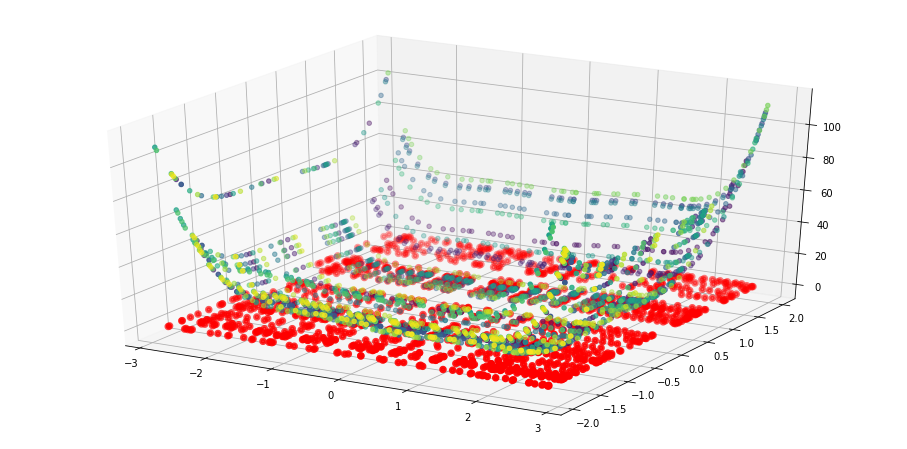

In [132]:
xx1val = x1val
xx2val = x2val
x1plt, x222 = np.meshgrid(xx1val, xx2val)
y1plt = f(x1plt, x222)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(2500)
ax.scatter(x1plt, x222, y111, marker = 'o', linewidths=1, c=col)

ax.scatter(X_train[:, 0], X_train[:, 1], predictTrain, marker = 'o', linewidths=3,c='RED')
#ax.view_init(10, 70)

# **ANFIS**

**f1** 

In [133]:

import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/anfis-master/anfis/')
!pip install '/content/drive/MyDrive/Colab Notebooks/anfis-master/'
import anfis
from anfis import mfDerivs
from anfis import membershipfunction

Mounted at /content/drive
Processing /content/drive/MyDrive/Colab Notebooks/anfis-master
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for anfis: filename=anfis-0.3.1-py3-none-any.whl size=7996 sha256=b5e43616182146b8ea4398bfe8c1a3fac7c64c07e07110fd39c6d23b2064b4af
  Stored in directory: /root/.cache/pip/wheels/9c/d2/59/2a83eca438b10aff737b38be00fcbb9006782f01f00ede71e5
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=89f6ead18f041cfe03c6f3126226e8de413de5d7eb1104a50c953aa2748efb48
  Stored in directory: /root/.cache/pip/w

In [136]:
def generation_f2(count,max_x,min_x,max_x2,min_x2):
  x2val=[]
  x1val=[]
  i = 0
  while i < count:
    rand=(np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x) and rand<=(max_x) ):
      x1val.extend(rand)
      i = i + 1
  i = 0
  while i < count:
    rand=(np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x2) and rand<=(max_x2) ):
      x2val.extend(rand)
      i = i + 1
  return  x1val,x2val

def generation_f1(count):
  x1val=[]
  i = 0
  while i < count:
    rand=np.random.binomial(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    x1val.extend(rand)
    i = i + 1
  return x1val

def approximation_quality(deviations,predictData,y_data):
  count=0
  for i in range(len(predictData)):
    if(predictData[i]>=(y_data[i]-deviations) and predictData[i]<=(y_data[i]+deviations)):
      count=count+1
  return percentage(count,len(predictData))

def f1(x):
  y=[]
  for i in range (0,(len(x))):
      y.append(np.exp(x[i]))
  return y

def f2(x, y): 
    return (4 - (2.1*x*x) + (x**4)/3)*x*x + x*y + (-4 + 4*y*y)*y*y

def percentage(part, whole):
  return 100 * float(part)/float(whole)

x1val = generation_f1(500) 
#x1, x2 = np.meshgrid(x1val, x2val)
#f2z = f2(x1,x2)
z = f1(x1val)
x11=[]
x22=np.full(2500,0)
f2zz=[]
for l in x1val:
    x11.append(l)
#for l in x2:
#    x22.extend(l)
for l in z:
    f2zz.append(l)

x11=np.reshape(x11,(len(x11),1))
x22=np.reshape(x22,(len(x22),1))
f2zz=np.reshape(f2zz,(len(f2zz),1))

if(os.path.exists('datasetMy.txt')):
    os.remove('datasetMy.txt')
file=open('datasetMy.txt','w')
for i in range(len(x11)):
  file.write('"'+str(i)+'" '+str(x11[i][0])+' '+str(x22[i][0])+' '+str(f2zz[i][0])+'\n')
file.close()

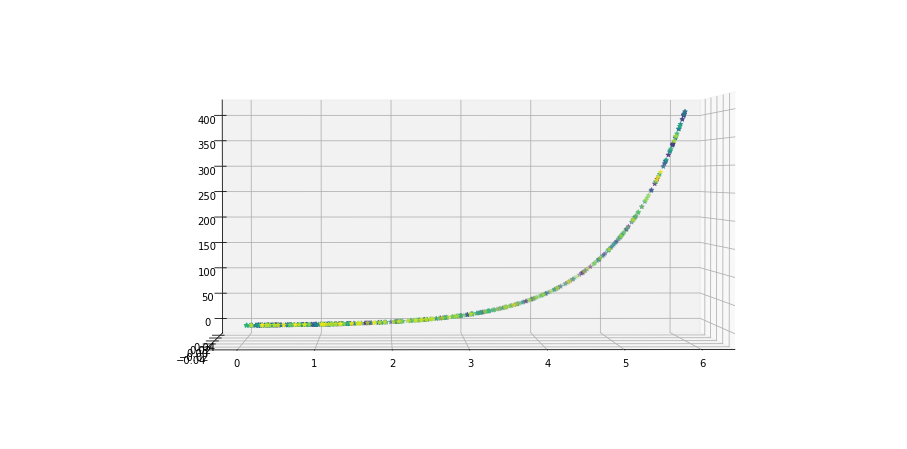

In [137]:
ts = np.loadtxt("datasetMy.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(Y))
ax.scatter(X[:, 0], X[:, 1], Y, marker = '*', linewidths=1, c=col)
ax.view_init(1, -91)

current error: 21321.71607124289
current error: 21685.754844306633
current error: 22068.821867744526
current error: 22468.5239831882
current error: 22879.293768299332
current error: 23291.80570260377
current error: 23693.839156759772
current error: 24073.01646408107
current error: 24420.151321704278
current error: 24731.015582117267
current error: 25005.787563382706
current error: 25247.325502608
current error: 25459.57280187261
current error: 25646.575100917362
current error: 25812.02160740609
current error: 25959.095324075497
current error: 26090.470660164647
current error: 26208.368635784907
current error: 26314.627021320288
51.165634
0.0
282.914863
Plotting errors


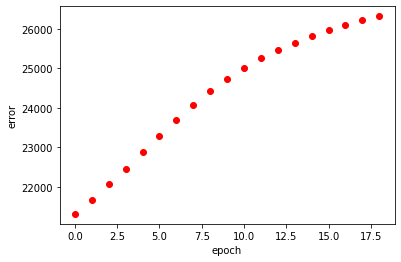

Plotting results


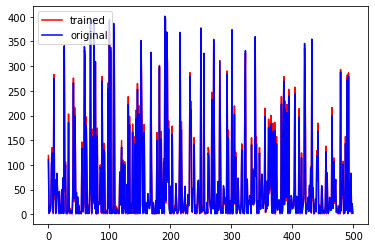

In [138]:

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

mfc = membershipfunction.MemFuncs(mf)
anf = anfis.anfis_model.ANFIS(X, Y, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

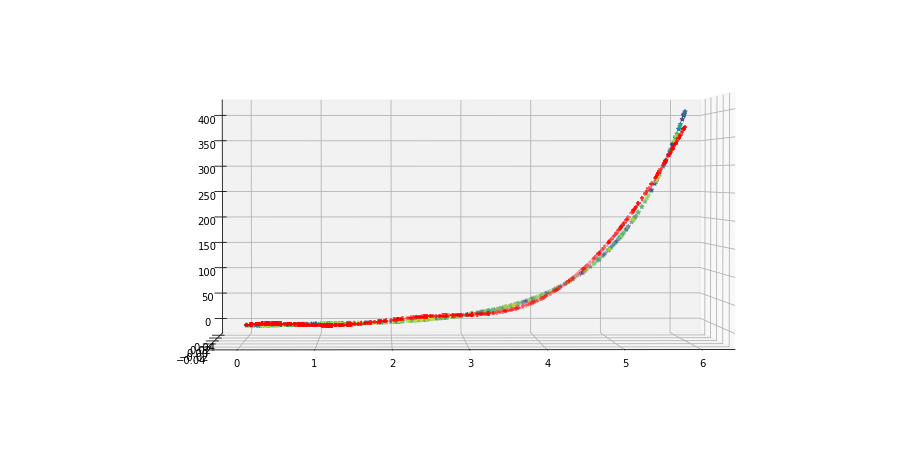

In [140]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
predictTrain=anfis.anfis_model.predict(anf,X)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

col = np.arange(len(Y))
ax.scatter(X[:, 0], X[:, 1], Y, marker = '*', linewidths=1, c=col)
ax.scatter(X[:, 0], X[:, 1], predictTrain, marker = '+', linewidths=1,c='RED')
ax.view_init(1, -91)
#ax.view_init(10, 70)
#fig2 = plt.figure(figsize=(16,8))
#ax2 = fig2.add_subplot(111, projection='3d')
#col = np.arange(len(Y))
#ax2.scatter(X[:, 0], X[:, 1], predictTrain, marker = '+', linewidths=1,c='RED')
#ax2.view_init(10, 70)

In [141]:
deviations=np.std(Y, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,Y))

% верно полученных точек в тестовых данных
100.0


**F2**

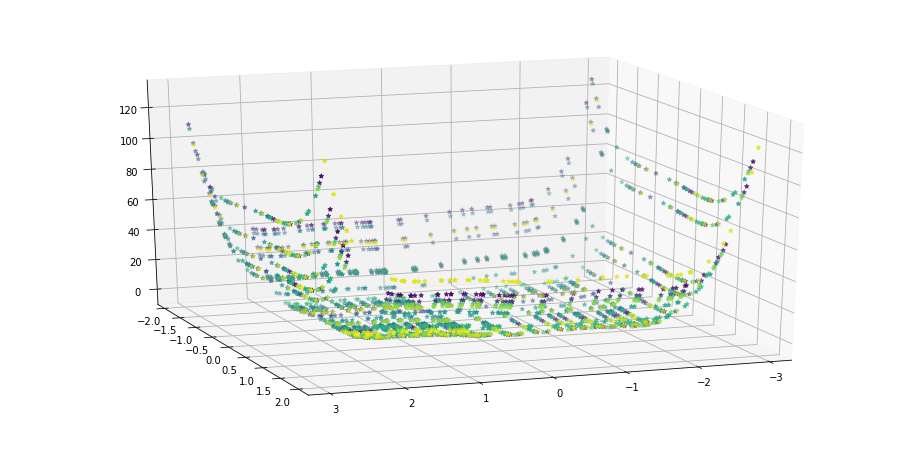

In [142]:
x1val,x2val=generation_f2(50,3,-3,2,-2) 
x1f2, x2f2 = np.meshgrid(x1val, x2val)
f2z = f2(x1f2,x2f2)
#z = f1(x1, 0.1, 0.1)
x11f2=[]
x22f2=[]
f2zz=[]
for l in x1f2:
    x11f2.extend(l)
for l in x2f2:
    x22f2.extend(l)
for l in f2z:
    f2zz.extend(l)

x11f2=np.reshape(x11f2,(len(x11f2),1))
x22f2=np.reshape(x22f2,(len(x22f2),1))
f2zz=np.reshape(f2zz,(len(f2zz),1))
if(os.path.exists('datasetMy.txt')):
    os.remove('datasetMy.txt')
file=open('datasetMy.txt','w')
for i in range(len(x11f2)):
  file.write('"'+str(i)+'" '+str(x11f2[i][0])+' '+str(x22f2[i][0])+' '+str(f2zz[i][0])+'\n')
file.close()
ts = np.loadtxt("datasetMy.txt", usecols=[1,2,3])
XAF2 = ts[:,0:2]
YAF2 = ts[:,2]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(YAF2))
ax.scatter(XAF2[:, 0], XAF2[:, 1], YAF2, marker = '*', linewidths=1, c=col)
ax.view_init(20,70)

current error: 16673.6900277249
current error: 16344.62155936136
current error: 16026.3308235132
current error: 15718.650231849133
current error: 15392.335528106934
current error: 15047.74606775613
current error: 14685.606783255782
current error: 14307.076273822095
current error: 13913.826878310972
current error: 13508.143325910702
current error: 13093.048758035808
current error: 12672.466469955682
current error: 12251.418234858995
current error: 11836.238430913209
current error: 11434.73796400224
current error: 11056.174950454579
current error: 10710.784147568487
current error: 10408.525384587861
current error: 10156.75506981439
-21.184605
-270.382541
25.860758
Plotting errors


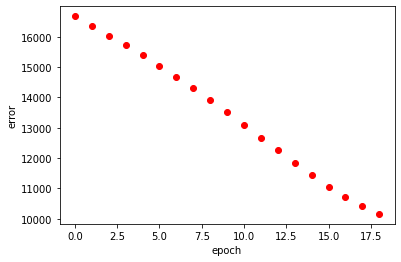

Plotting results


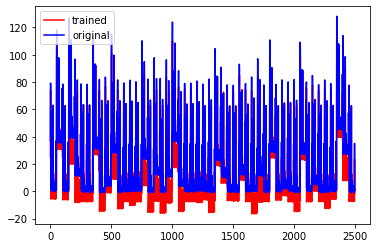

In [143]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

mfc = membershipfunction.MemFuncs(mf)
anf = anfis.anfis_model.ANFIS(XAF2, YAF2, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

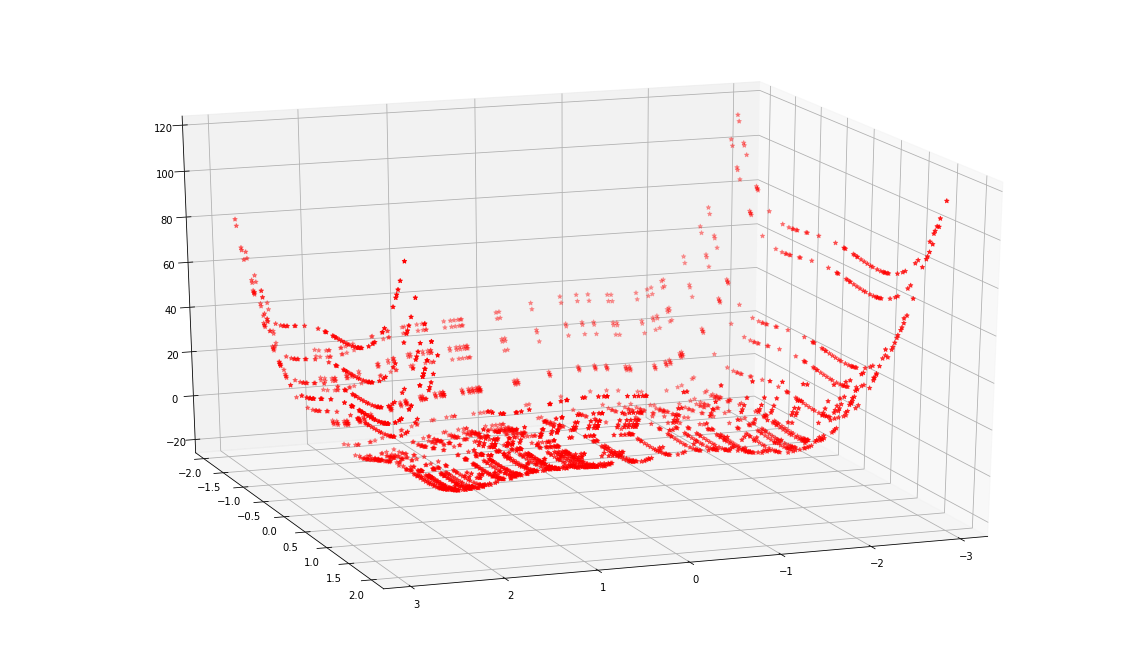

In [144]:
predictTrain=anfis.anfis_model.predict(anf,XAF2)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')

col = np.arange(len(YAF2))
#ax.scatter(XAF2[:, 0], XAF2[:, 1], YAF2, marker = '*', linewidths=1, c=col)
ax.scatter(XAF2[:, 0], XAF2[:, 1], predictTrain, marker = '*', linewidths=1,c='RED')
ax.view_init(20,70)

In [145]:
deviations=np.std(YAF2, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,YAF2))

% верно полученных точек в тестовых данных
98.96


# ***RBF***

In [147]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Обученные модели/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
from scipy import *  
from scipy.linalg import norm, pinv  
from matplotlib import pyplot as plt
import numpy as np  
from numpy.random import geometric
import pickle
from sklearn.model_selection import train_test_split

In [149]:
class RBF:  
    def __init__(self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        #Here we initialize the center corresponding to the hidden neuron of RBF
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
                 #Here we are two important parameters that define the RBF network..
                 #The first parameter represents β, the second represents the connection weight
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return np.exp(-self.beta * norm(c-d)**2)  
       
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = np.zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
         #Pass x and y values ​​for training   
    def train(self, X, Y):  
        """ X: matrix of dimensions n x indim  
            y: column vector of dimension n x 1 """  
        # choose random center vectors from training set  
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]  
        #The center of operation is: [76 21 58 61 2 1 64 77 34 33]   
        #print ("center", self.centers)  
        # calculate activations of RBFs  
        G = self._calcAct(X)  
        #print (G)  
           
        # calculate output weights (pseudoinverse)  
        self.W = np.dot(pinv(G), Y)  
           
    def test(self, X):  
        """ X: matrix of dimensions n x indim """  
        G = self._calcAct(X)  
        Y = np.dot(G, self.W)  
        return Y  

In [150]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

def predict(loaded_model, row):
  outputs = forward_propagate(loaded_model, row)
  return outputs

def approximation_quality(deviations,predictData,y_data):
  count=0
  for i in range(len(predictData)):
    if(predictData[i]>=(y_data[i]-deviations) and predictData[i]<=(y_data[i]+deviations)):
      count=count+1
  return percentage(count,len(predictData))

def f2(x, y): 
    return (4 - (2.1*x*x) + (x**4)/3)*x*x + x*y + (-4 + 4*y*y)*y*y
  

**f2**

In [151]:
filename_model = 'modelF2-СетьRBF-line.sav'

x1val,x2val=generation_f2(50,3,-3,2,-2) 

x1, x2 = np.meshgrid(x1val, x2val)
z = f2(x1,x2)
x11=[]
x22=[]
zz=[]
for l in x1:
    x11.extend(l)
for l in x2:
    x22.extend(l)
for l in z:
    zz.extend(l)

x11=np.reshape(x11,(len(x11),1))
x22=np.reshape(x22,(len(x22),1))
zz=np.reshape(zz,(len(zz),1))
 
dataset =np.concatenate((x11,x22),axis=1)
X_train, X_test, y_train, y_test = train_test_split(dataset, zz, test_size=0.4, random_state=123)

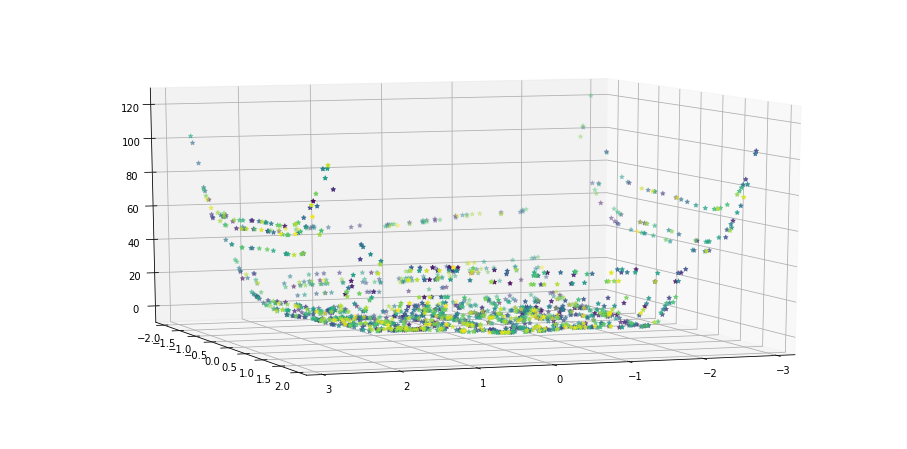

In [152]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(y_train))
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker = '*', linewidths=1, c=col)
ax.view_init(10, 70)

In [153]:
rbf = RBF(2, 3000, 1)
rbf.train(X_train, y_train)
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)
pickle.dump(rbf, open(filename_model, 'wb'))

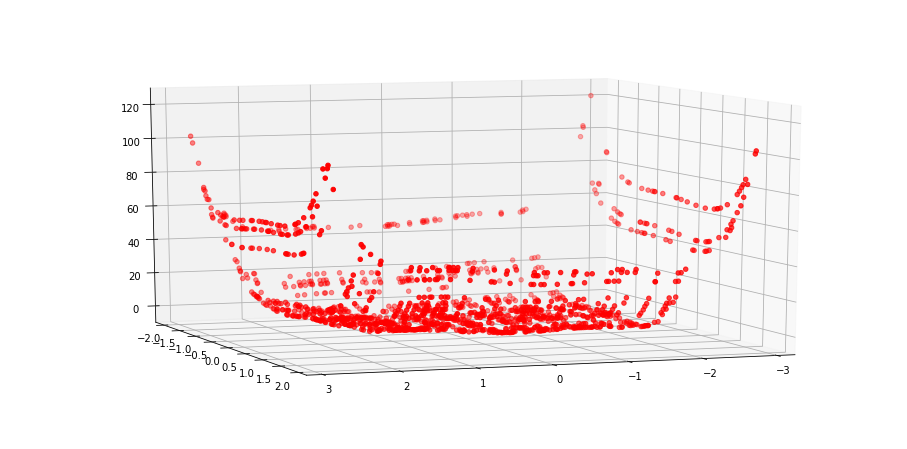

In [154]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(y_train))
#ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker = 'o', linewidths=1, c=col)
ax.scatter(X_train[:, 0], X_train[:, 1], rez_train, marker = 'o', linewidths=1, c='red')
ax.view_init(10, 70)

In [155]:
loaded_model = pickle.load(open(filename_model, 'rb'))
deviations=np.std(y_test, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,rez_test,y_test))

% верно полученных точек в тестовых данных
100.0


**f1**

In [159]:
filename_model = 'modelF1-СетьRBF-line.sav'

X, Y = generation_sa(500)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=123)

In [160]:
rbf = RBF(1, 30000, 1)
rbf.train(X_train, y_train)
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)
pickle.dump(rbf, open(filename_model, 'wb'))

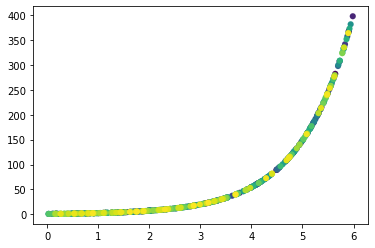

In [161]:
plt.scatter(X, Y , marker = 'o', linewidths=0.1, c=np.arange(len(Y)))

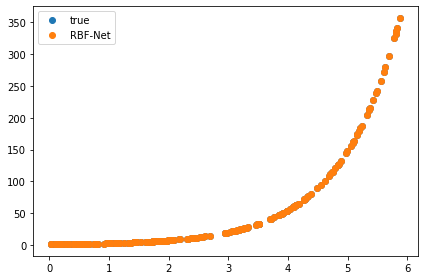

In [162]:
rez_test = rbf.test(X_test) 
plt.plot(np.sort(X_test, axis=0), np.sort(y_test, axis=0), 'o', label='true')
plt.plot(np.sort(X_test, axis=0) , np.sort(rez_test , axis=0), 'o', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [163]:
loaded_model = pickle.load(open(filename_model, 'rb'))
deviations=np.std(y_test, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,rez_test,y_test))

% верно полученных точек в тестовых данных
100.0
